In [2]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import linear_model
from sklearn.preprocessing import MinMaxScaler
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR

In [3]:
#Data berasal dari situs kaggle.com

In [4]:
#Proses membaca data
adp = pd.read_csv("Admission_Predict.csv")

In [5]:
#Untuk mengetahui berapa kolom yg terdapat pada data
#dan tipe data yg digunakan
adp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          498 non-null float64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 499 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(5), int64(4)
memory usage: 35.2 KB


In [6]:
#Menampilkan data
adp.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118.0,4,4.5,4.5,9.65,1,0.92
1,2,324,107.0,4,4.0,4.5,8.87,1,0.76
2,3,316,104.0,3,3.0,3.5,8.00,1,0.72
3,4,322,110.0,3,3.5,2.5,8.67,1,0.80
4,5,314,103.0,2,2.0,3.0,8.21,0,0.65


In [7]:
#Clean Data

In [8]:
#Mengubah nama kolom dari yg memiliki spasi menjadi tanpa spasi

adp=adp.rename(columns = {'Chance of Admit ':'Chance of Admit'})
adp=adp.rename(columns = {'LOR ':'LOR'})

In [9]:
#Drop serial no. yg tidak diperlukan

adp = adp.drop(["Serial No."],axis=1)

In [10]:
#Mendeteksi nilai yang hilang pada data

print(adp.isnull().sum())

GRE Score            0
TOEFL Score          2
University Rating    0
SOP                  0
LOR                  0
CGPA                 1
Research             0
Chance of Admit      0
dtype: int64


In [11]:
#Menghapus data yang tidak memiliki nilai/isi

adp[['TOEFL Score','CGPA']].replace('', np.nan, inplace=True)
adp = adp.dropna(how='any')           # assign back
adp.dropna(how='any', inplace=True)

C:\Users\asus\Anaconda3\lib\site-packages\pandas\core\frame.py:4042: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  method=method)


In [12]:
#Mendeteksi kembali apakah masih terdapat nilai yang hilang pada data atau tidak

print(adp.isnull().sum())

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64


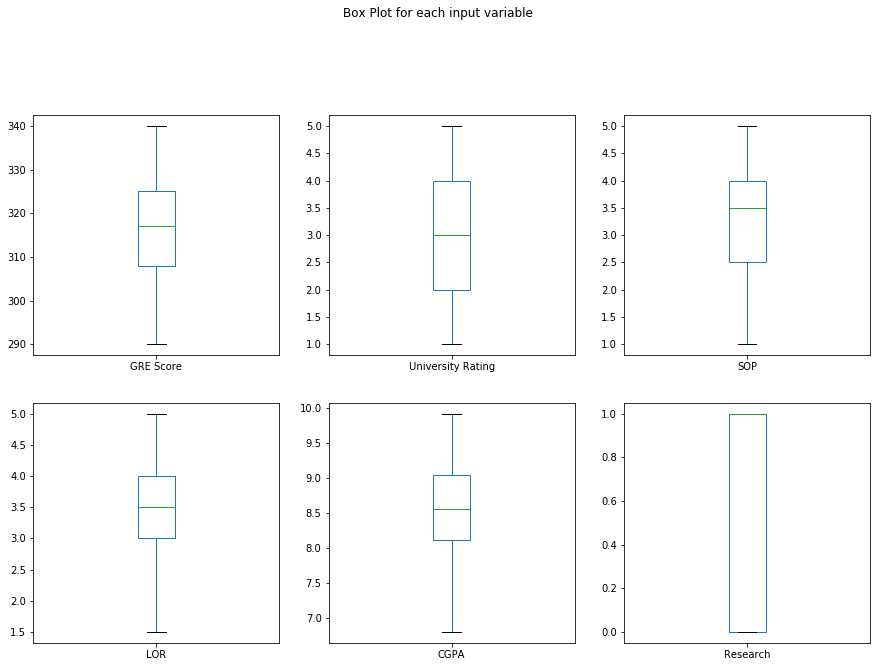

In [42]:
adp[['GRE Score','University Rating','SOP','LOR','CGPA','Research']].plot.box(subplots=True, layout=(3,3), sharex=False, sharey=False, figsize=(15,15), title='Box Plot for each input variable')
plt.show()

In [69]:
#Exploratory Data Analysis

In [70]:
#Variabel dependen dan independen

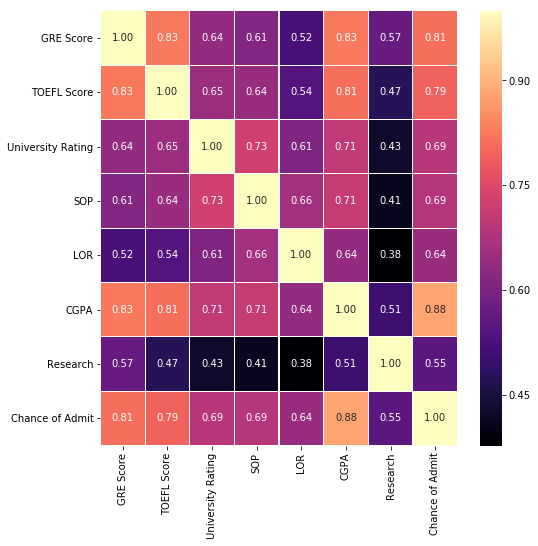

In [43]:
#Menampilkan nilai kolerasi antar kolom

fig,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(adp.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f', cmap="magma")
plt.show()

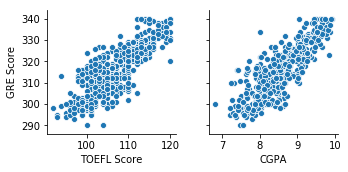

In [16]:
g = sns.pairplot(adp,x_vars=["TOEFL Score","CGPA"],y_vars="GRE Score")

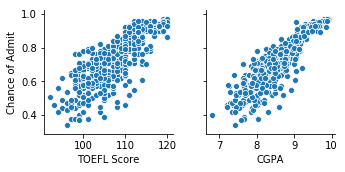

In [17]:
g = sns.pairplot(adp,x_vars=["TOEFL Score","CGPA"],y_vars="Chance of Admit")

In [18]:
#Algortima yg digunakan: Regresi linear dan Support Vector Machine

In [19]:
#memberi nilai pada variabel dependent dan independent
x=adp[['TOEFL Score','CGPA']]
y=adp['Chance of Admit']

In [20]:
#Membagi data menjadi data training dan testing
x_train, test_x, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

In [21]:
x_train_toe=x_train[['TOEFL Score']]
test_x_toe=test_x[['TOEFL Score']]

x_train_c=x_train[['CGPA']]
test_x_c=test_x[['CGPA']]

In [22]:
#NORMALISASI

In [23]:
scaler = MinMaxScaler()
x_train_toe = scaler.fit_transform(x_train_toe)
x_test_toe = scaler.transform(test_x_toe)

x_train_c = scaler.fit_transform(x_train_c)
x_test_c = scaler.transform(test_x_c)

In [24]:
reg_pred=[]

In [25]:
#Regresi Linear
regr = linear_model.LinearRegression()

In [26]:
#TOEFL Score
regr.fit (x_train_toe, y_train)
y_predict_toe = regr.predict(x_test_toe)
mse=np.mean((y_predict_toe - y_test) ** 2)
reg_pred.append(mse)

In [27]:
#CGPA
regr.fit (x_train_c, y_train)
y_predict_c = regr.predict(x_test_c)
mse=np.mean((y_predict_c - y_test) ** 2)
reg_pred.append(mse)

In [28]:
#SVM
regressor = SVR(kernel='rbf')

In [29]:
#TOEFL Score
regressor.fit(x_train_toe, y_train)
y_predict_t_svm = regressor.predict(x_test_c)
mse=np.mean((y_predict_t_svm - y_test) ** 2)
reg_pred.append(mse)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [30]:
#CGPA
regressor.fit(x_train_toe, y_train)
y_predict_c_svm = regressor.predict(x_test_toe)
mse=np.mean((y_predict_c_svm - y_test) ** 2)
reg_pred.append(mse)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


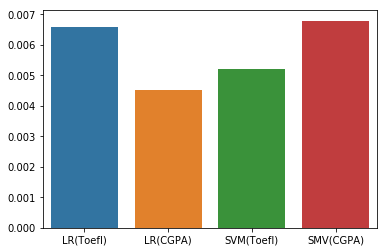

In [32]:
#Perbandingan error
x_ax=['LR(Toefl)','LR(CGPA)', 'SVM(Toefl)','SMV(CGPA)']
y_ax=reg_pred
sns.barplot(x=x_ax,y=y_ax)

Text(0, 0.5, 'Chance of Admit')

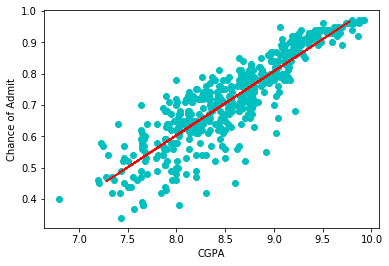

In [44]:
#Menampilkan plot diagram CGPA
plt.plot(x['CGPA'], y,'co',label='fit')
plt.plot(test_x_c,y_predict_c,'r',label='data')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")

Text(0, 0.5, 'Chance of Admit')

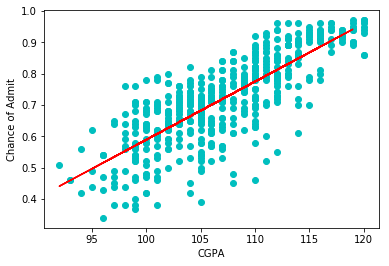

In [46]:
#Menampilkan plot diagram CGPA
plt.plot(x['TOEFL Score'], y,'co',label='fit')
plt.plot(test_x_toe,y_predict_toe,'r',label='data')
plt.xlabel("CGPA")
plt.ylabel("Chance of Admit")